<a href="https://colab.research.google.com/github/Harshavardhan1005/Time-Series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time series is not appplied if**
1. Values are constant
2. Values are in the form of function

**Components of time series:**
1. Trend
2. Seasonality
3. Irregularity
4. Cyclic

**Stationary** --> constant mean, constant varience and autocovarience does not depend on time
**To check stationary** --> Rolling statictics,ADCF Test(Dickey Fuller Test)

**ARIMA** --> It is the combination of AR and MA(Auto Regressive and Moving Average)
1. p autoregressive lags
2. q moving average
3. d order of differentiation

**Seasonal ARIMA** --> applied if the data is seasonal


In [148]:
# Import all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import fbprophet
from fbprophet import Prophet

from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset

In [149]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/time_series_data.csv')

In [150]:
df.columns = ["Month","Sales"]

In [151]:
df.shape

(107, 2)

In [152]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [153]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [154]:
df.dropna(inplace=True)

In [155]:
df['Month'] = pd.to_datetime(df['Month'])

In [156]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [157]:
df.set_index('Month',inplace=True)

In [158]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


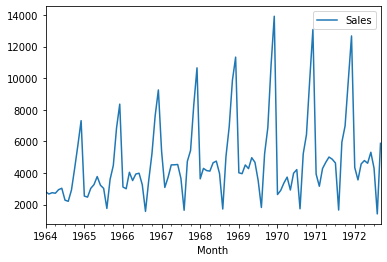

In [159]:
df.plot()

In [160]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [161]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [162]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


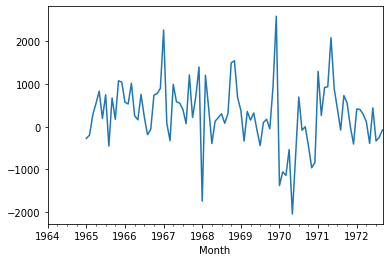

In [163]:
df['Seasonal First Difference'].plot()

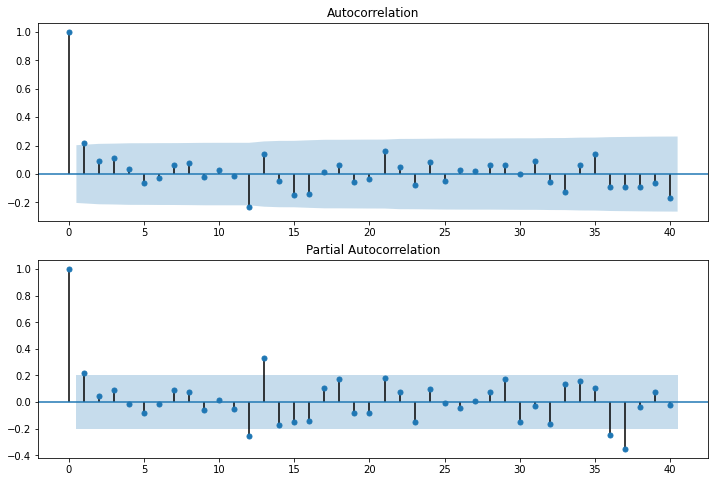

In [164]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [165]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



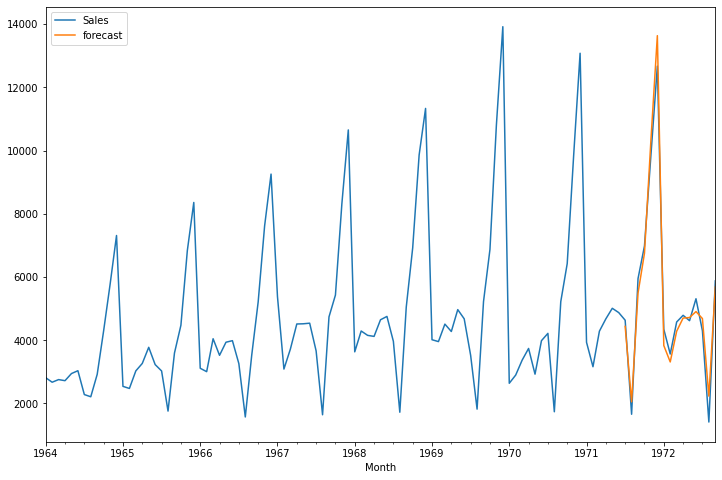

In [166]:
df['forecast']=model_fit.predict(start=90,end=104,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [167]:
df.tail()

,Sales,Seasonal First Difference,forecast
Month,,,
1972-05-01,4618.0,-392.0,4717.511416
1972-06-01,5312.0,438.0,4906.404282
1972-07-01,4298.0,-335.0,4685.436956
1972-08-01,1413.0,-246.0,2232.408745
1972-09-01,5877.0,-74.0,5686.558083


In [168]:
future_dates = [df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [169]:
future_df = pd.concat([df,future_datest_df])

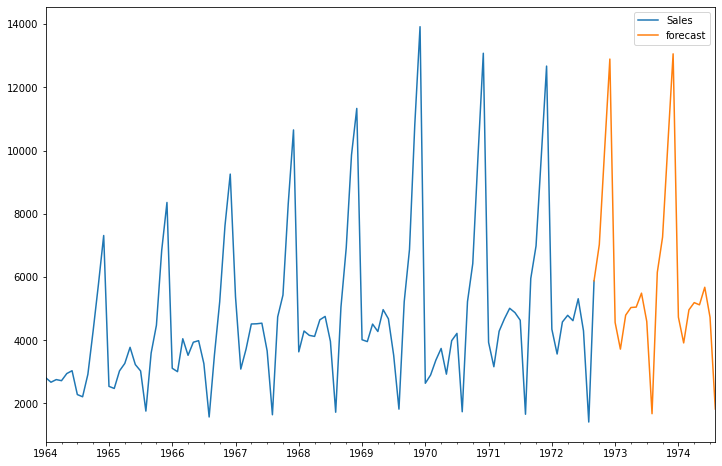

In [170]:
future_df['forecast'] = model_fit.predict(start = 104, end = 148, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [171]:
df1 = pd.read_csv('/content/drive/MyDrive/time_series_data.csv')

In [172]:
df1.dropna(axis=0,inplace=True)

In [173]:
df1.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [174]:
df1.columns = ["ds","y"]

In [175]:
df1.dropna(axis=0,inplace=True)

In [176]:
df1.head()

,ds,y
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [177]:
model=Prophet()

In [178]:
model.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [179]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [180]:
future_dates = model.make_future_dataframe(periods=500)

In [181]:
pred = model.predict(future_dates)

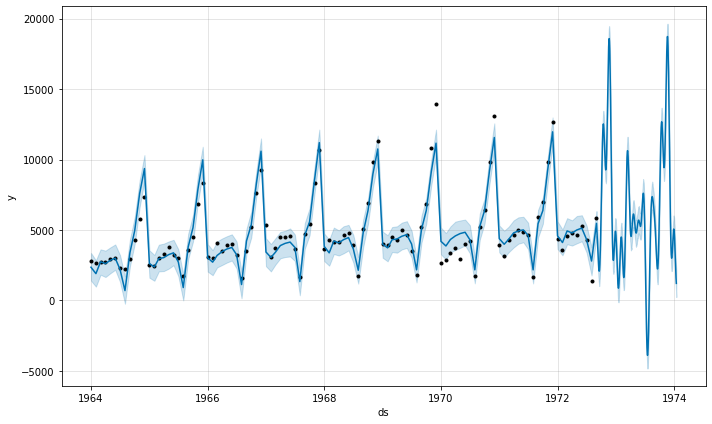

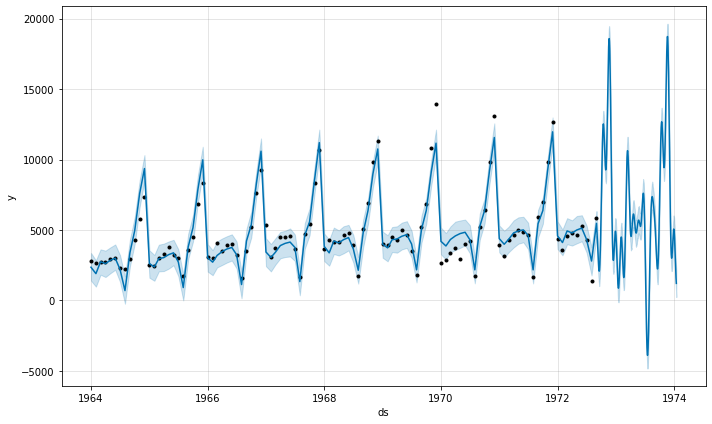

In [182]:
model.plot(pred)